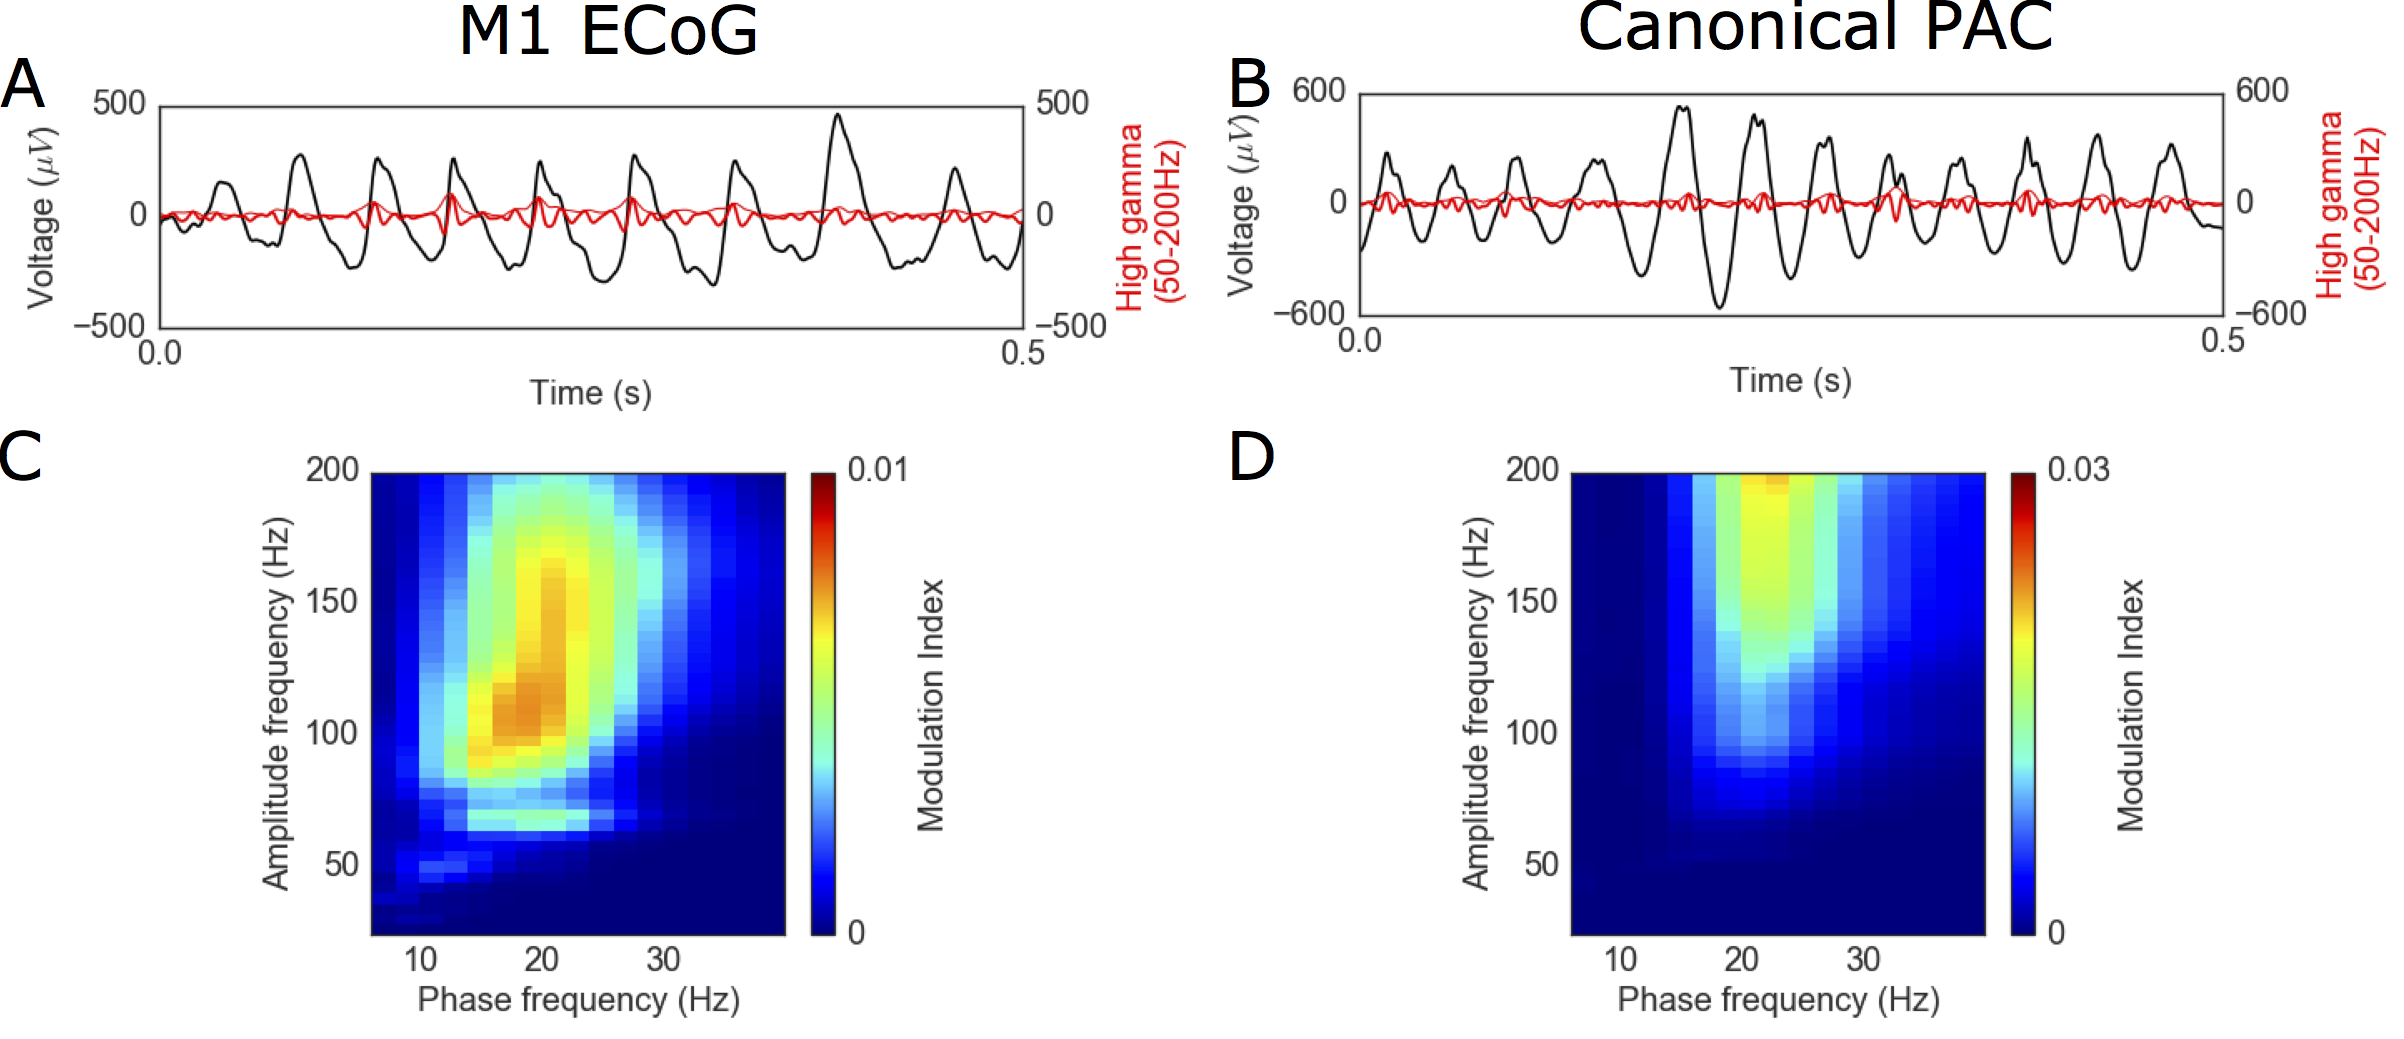

In [1]:
from IPython.display import Image
Image(filename = "./img/fig6.png", width=600)

# Figure 6
Sharp beta oscillations produce similar cross-frequency coupling estimates compared with canonical phase-amplitude coupling. A, Raw voltage recording in a PD patient before DBS
(black) overlaid with the highgammacomponent (thick red line) and its analytic amplitude (thin red line).B, Same format as A with a simulated signal with canonical PAC between the phase of beta
oscillations and high gamma amplitude. C, D, Comodulograms showing similar estimated PAC between beta phase and high gamma amplitude in both the (C)M1 recording and (D) canonical PAC
signal.

**Imports**

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

In [3]:
import util

**Load data**

In [4]:
ecog = util.loadPD()
Fs, t, S, Sdy, flo, fhi = util.loadmeta()
m1 = ecog['B'][0]

**Calculate canonical PAC waveform**

In [5]:
# D. Simulate a canonical PAC signal
fhisim = (50,200)
T = 30
np.random.seed(0)
simbetaphase, simbeta = util.simphase(T, flo, dt=.001, w=3, returnwave=True)

N = 12 * 20
simhgamma = util.simfiltonef(T, fhisim, Fs, N)
hgammabias = (np.pi - np.abs(simbetaphase)) / np.pi * .01
simpac = simbeta*.3 + simhgamma * hgammabias
simpac = simpac*5000 # get on same scale as m1 recording

# A 
### M1 raw and high gamma time series

In [6]:
# Calculate high gamma amplitude time series
from pac import firf
m1hg = firf(m1, fhi, Fs, Ntaps = 60, rmvedge=False)
cahg = firf(simpac, fhi, Fs, Ntaps = 60, rmvedge=False)
m1hga = np.abs(sp.signal.hilbert(m1hg))
cahga = np.abs(sp.signal.hilbert(cahg))

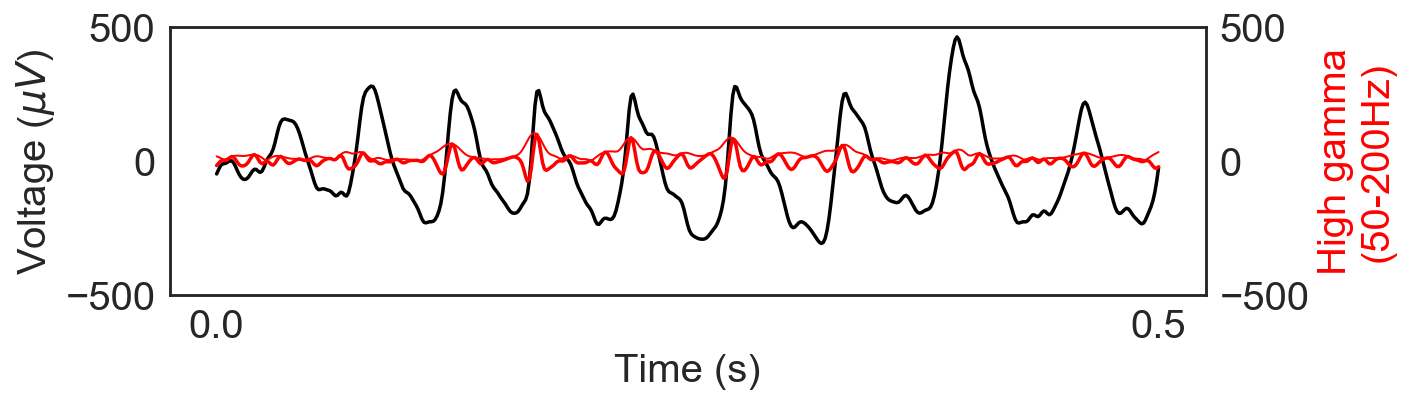

In [7]:
# Plot M1 recording
plt.figure(figsize=(10,3))
trangem1 = [3000,3501]
plt.plot(t[:trangem1[1]-trangem1[0]],m1[trangem1[0]:trangem1[1]],'k')
plt.yticks(size=20)
plt.xticks((0,.5),size=20)
plt.xlabel('Time (s)',size=20)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(t[:trangem1[1]-trangem1[0]],m1hg[trangem1[0]:trangem1[1]],'r')
ax2.plot(t[:trangem1[1]-trangem1[0]],m1hga[trangem1[0]:trangem1[1]],'r',linewidth=1)
ax1.set_ylabel('Voltage ($\mu V$)',size=20)
ax2.set_ylabel('High gamma\n(50-200Hz)',color='r',size=20)
ax1.set_ylim((-500,500))
ax2.set_ylim((-500,500))
ax1.set_yticks(np.arange(-500,501,500))
ax2.set_yticks(np.arange(-500,501,500))
plt.yticks(size=20)
plt.tight_layout()

# B
### Canonical PAC raw and high gamma time series

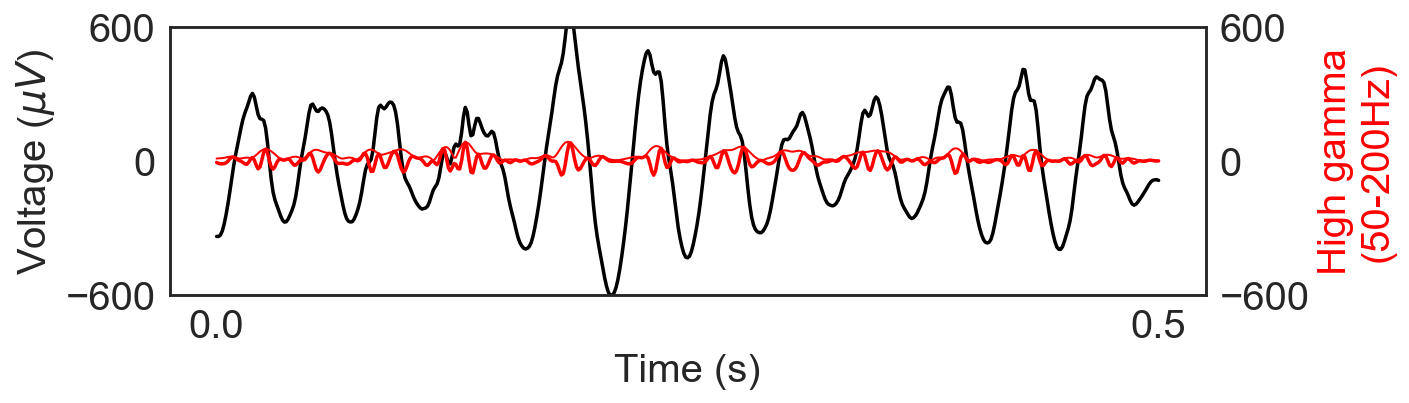

In [8]:
# Plot canonical PAC time series
plt.figure(figsize=(10,3))
trangeca = [500,1001]
plt.plot(t[:trangeca[1]-trangeca[0]],simpac[trangeca[0]:trangeca[1]],'k')
plt.yticks(size=20)
plt.xticks((0,.5),size=20)
plt.xlabel('Time (s)',size=20)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(t[:trangeca[1]-trangeca[0]],cahg[trangeca[0]:trangeca[1]],'r')
ax2.plot(t[:trangeca[1]-trangeca[0]],cahga[trangeca[0]:trangeca[1]],'r',linewidth=1)
ax1.set_ylabel('Voltage ($\mu V$)',size=20)
ax2.set_ylabel('High gamma\n(50-200Hz)',color='r',size=20)
ax1.set_ylim((-600,600))
ax2.set_ylim((-600,600))
ax1.set_yticks(np.arange(-600,601,600))
ax2.set_yticks(np.arange(-600,601,600))
plt.yticks(size=20)
plt.tight_layout()

# C
### M1 phase-amplitude coupling comodulogram

In [9]:
# Calculate comodulograms
# C. Plot comodulogram of this signal
from pac import comodulogram
# Parameters
fp = (6,40)
fa = (20,200)
dp = 2
da = 4
w=7
pac_method = 'mi_tort'

f_phases = np.arange(fp[0], fp[1]+dp, dp)
f_amps = np.arange(fa[0], fa[1]+da, da)
comodm1 = comodulogram(m1, m1, fp, fa, dp, da, Fs, pac_method=pac_method, w=w)
comodca = comodulogram(simpac, simpac, fp, fa, dp, da, Fs, pac_method=pac_method, w=w)

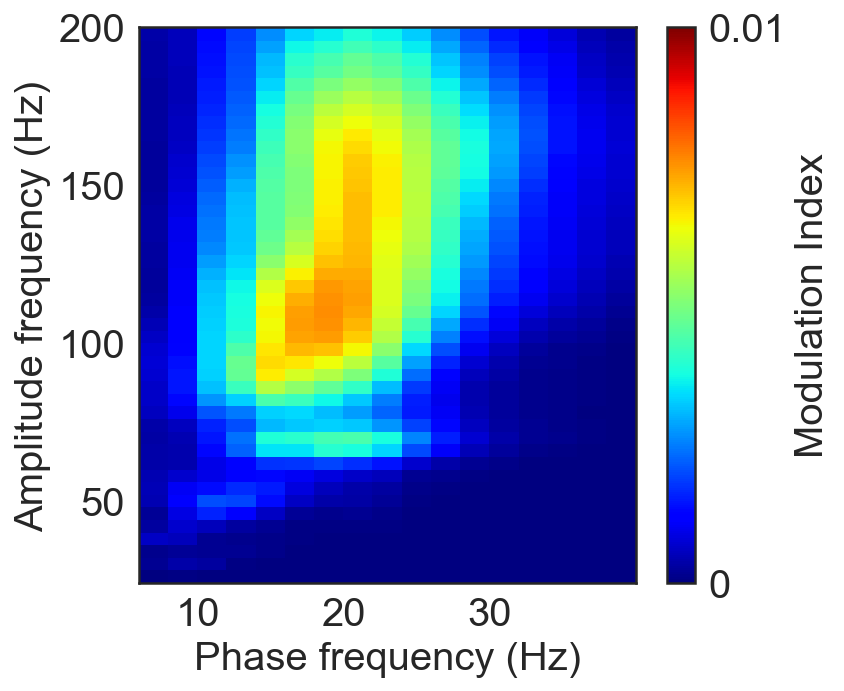

In [10]:
from matplotlib import cm
clim = [0,.01]

plt.figure(figsize=(6,5))
cax = plt.pcolor(f_phases, f_amps+da, comodm1.T, cmap=cm.jet, vmin=clim[0], vmax=clim[1])
cbar = plt.colorbar(cax, ticks=clim)
cbar.ax.set_yticklabels(clim,size=20)
cbar.ax.set_ylabel('Modulation Index', size=20)
plt.axis([f_phases[0], f_phases[-1], f_amps[0]+da, f_amps[-1]])
plt.xlabel('Phase frequency (Hz)', size=20)
plt.ylabel('Amplitude frequency (Hz)', size=20)
plt.yticks(np.arange(50,250,50),size=20)
plt.xticks(np.arange(10,40,10),size=20)

plt.tight_layout()

# D
### Canonical PAC phase-amplitude coupling comodulogram

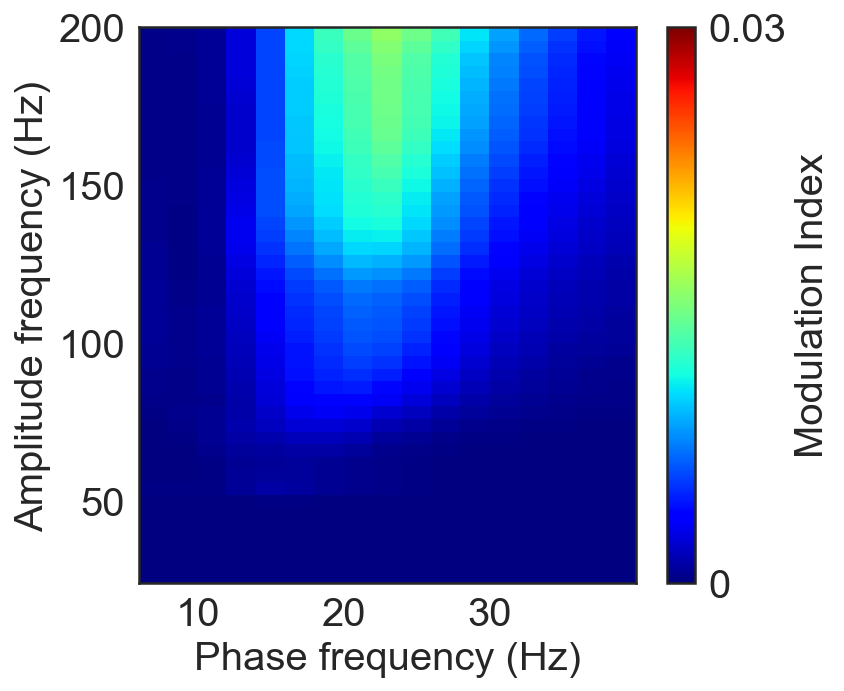

In [11]:
clim = [0,.03]

plt.figure(figsize=(6,5))
cax = plt.pcolor(f_phases, f_amps+da, comodca.T, cmap=cm.jet, vmin=clim[0], vmax=clim[1])
cbar = plt.colorbar(cax, ticks=clim)
cbar.ax.set_yticklabels(clim,size=20)
cbar.ax.set_ylabel('Modulation Index', size=20)
plt.axis([f_phases[0], f_phases[-1], f_amps[0]+da, f_amps[-1]])
plt.xlabel('Phase frequency (Hz)', size=20)
plt.ylabel('Amplitude frequency (Hz)', size=20)
plt.yticks(np.arange(50,250,50),size=20)
plt.xticks(np.arange(10,40,10),size=20)

plt.tight_layout()